In [1]:
import pandas as pd
import nltk
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')


In [2]:
fd = pd.read_csv("TopicModeling_consumer_complains.csv")

In [3]:
fd.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [4]:
fd.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [5]:
fd.shape

(670598, 18)

In [6]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670598 entries, 0 to 670597
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 670598 non-null  object
 1   Product                       670598 non-null  object
 2   Sub-product                   472396 non-null  object
 3   Issue                         670598 non-null  object
 4   Sub-issue                     269868 non-null  object
 5   Consumer complaint narrative  114704 non-null  object
 6   Company public response       145197 non-null  object
 7   Company                       670598 non-null  object
 8   State                         665293 non-null  object
 9   ZIP code                      665274 non-null  object
 10  Tags                          94730 non-null   object
 11  Consumer consent provided?    208151 non-null  object
 12  Submitted via                 670598 non-null  object
 13 

la plupart des variables sont des objets

In [7]:
fd.isnull().sum() / fd.shape[0]

Date received                   0.000000
Product                         0.000000
Sub-product                     0.295560
Issue                           0.000000
Sub-issue                       0.597571
Consumer complaint narrative    0.828953
Company public response         0.783481
Company                         0.000000
State                           0.007911
ZIP code                        0.007939
Tags                            0.858738
Consumer consent provided?      0.689604
Submitted via                   0.000000
Date sent to company            0.000000
Company response to consumer    0.000000
Timely response?                0.000000
Consumer disputed?              0.061764
Complaint ID                    0.000000
dtype: float64

on reamrque qu'il ya plusieurs valeurs nulles avec des pourcentages trés élevés, mais dans ce cas on va utiliser que les deux colonnes product et Consumer complaint narrative

In [8]:
new=["Consumer complaint narrative","Product"]
new_df = fd[new]

In [9]:
new_df.head()

,Consumer complaint narrative,Product
0,NaN,Consumer Loan
1,NaN,Bank account or service
2,NaN,Bank account or service
3,NaN,Bank account or service
4,NaN,Mortgage


In [10]:
new_df.describe()

,Consumer complaint narrative,Product
count,114704,670598
unique,112690,12
top,I am filing this complaint because Experian ha...,Mortgage
freq,102,210324


pour la colonnes Consumer complaint narrative, il ya 82 % de valeurs nullees et il ya plusieurs lignes qui se repetent , donc on vas supprimer les lignes correspondantes

In [11]:
new_df = new_df.dropna(axis = 0)
new_df = new_df.drop_duplicates()

In [12]:
new_df.head()

,Consumer complaint narrative,Product
57729,Received Capital One charge card offer XXXX. A...,Credit card
57787,I do n't know how they got my cell number. I t...,Debt collection
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card
57848,"After looking at my credit report, I saw a col...",Credit reporting
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112726 entries, 57729 to 670596
Data columns (total 2 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Consumer complaint narrative  112726 non-null  object
 1   Product                       112726 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


on va changer le type du Product en categorie puis attribuer à chaque ligne un id en fonction du categorie du produit

In [14]:
new_df['Product'] = new_df['Product'].astype('category')
new_df["Id"] = new_df['Product'].cat.codes

In [15]:
new_df.head()

,Consumer complaint narrative,Product,Id
57729,Received Capital One charge card offer XXXX. A...,Credit card,2
57787,I do n't know how they got my cell number. I t...,Debt collection,4
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,2
57848,"After looking at my credit report, I saw a col...",Credit reporting,3
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,4


<AxesSubplot:xlabel='count', ylabel='Product'>

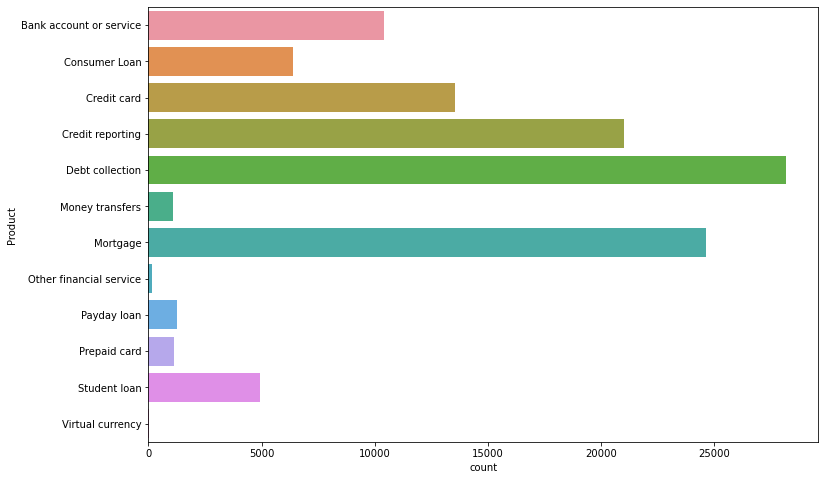

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(y = 'Product', data = new_df)

on reamrque qu' il y a plus de complaints consernant le debt collection et le Mortage et le credit reporting

In [17]:
products_categories = new_df['Product'].value_counts().index.tolist()
products_categories

['Debt collection',
 'Mortgage',
 'Credit reporting',
 'Credit card',
 'Bank account or service',
 'Consumer Loan',
 'Student loan',
 'Payday loan',
 'Prepaid card',
 'Money transfers',
 'Other financial service',
 'Virtual currency']

In [18]:
new_df['text_len'] = new_df["Consumer complaint narrative"].apply(len)
new_df.head()

,Consumer complaint narrative,Product,Id,text_len
57729,Received Capital One charge card offer XXXX. A...,Credit card,2,3875
57787,I do n't know how they got my cell number. I t...,Debt collection,4,282
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,2,3678
57848,"After looking at my credit report, I saw a col...",Credit reporting,3,472
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,4,656


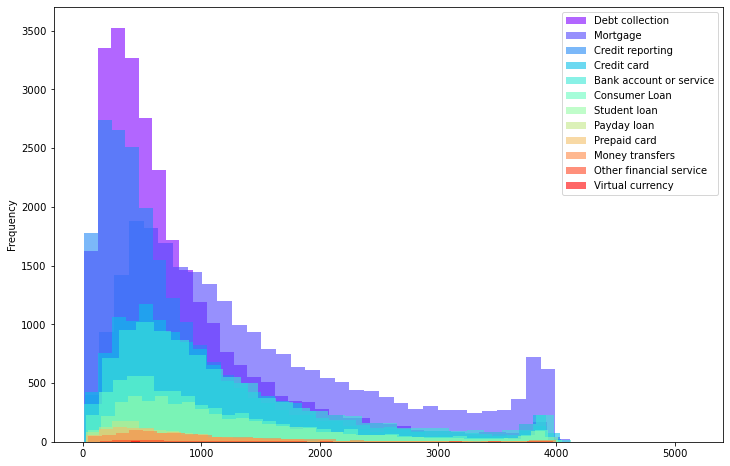

In [19]:
plt.figure(figsize=(12, 8))

color = iter(plt.cm.rainbow(np.linspace(0, 1, 12)))
for x in products_categories :
    c = next(color)
    new_df[new_df.Product==x].text_len.plot(bins=35, kind='hist', color=c, 
                                       label=x, alpha=0.6)
plt.legend()


   on remarque que les plaintes qui consernent le debt collection le Mortagage et le Credit repoting ont tendance à etre longues

In [20]:
new_df[new_df["Product"]=='Debt collection'].describe()

,Id,text_len
count,28181.0,28181.000000
mean,4.0,813.545580
std,0.0,759.327598
min,4.0,10.000000
25%,4.0,306.000000
50%,4.0,563.000000
75%,4.0,1037.000000
max,4.0,4033.000000


In [21]:
new_df[new_df["Product"]=='Mortgage'].describe()

,Id,text_len
count,24627.0,24627.000000
mean,6.0,1446.069964
std,0.0,1058.058114
min,6.0,15.000000
25%,6.0,615.000000
50%,6.0,1122.000000
75%,6.0,2029.500000
max,6.0,4364.000000


In [22]:
new_df[new_df["Product"]=='Credit reporting'].describe()

,Id,text_len
count,21008.0,21008.000000
mean,3.0,763.608102
std,0.0,741.535312
min,3.0,13.000000
25%,3.0,276.000000
50%,3.0,515.000000
75%,3.0,973.000000
max,3.0,4039.000000


On remarque qu'il y a des messages de plus de 4000 charactere !!!

In [23]:
new_df[new_df.text_len == 4364]["Consumer complaint narrative"].iloc[0]

'1 ) The pymt I made for {$870.00} that Ocwen rcvd on XXXX/XXXX/XXXX, and {$3300.00} from XXXX/XXXX/XXXX, and {$3300.00} from XXXX/XXXX/XXXX were all canceled and re-posted on XXXX/XXXX/XXXX. Why? \n\n2 ) Why is the pymt I made on XXXX/XXXX/XXXX for {$3300.00} not added to the paid year-to-date amount? \n\n3 ) Why is the paid ytd column on the XXXX/XXXX/XXXX stmt depicting yrly totals for XX/XX/XXXX -XXXX? \n\n4 ) If pymts Ocwen rcvd on XXXX/XXXX/XXXX, XXXX/XXXX/XXXX, and XXXX/XXXX/XXXX are applied on XXXX/XXXX/XXXX, why are they not showing up in the paid ytd column on the XXXX/XXXX/XXXX stmt? \n\n5 ) Out of my XX/XX/XXXX pymt of {$3300.00} that Ocwen rcvd on XXXX/XXXX/XXXX, why was {$2300.00} applied to Principal? \n\n6 ) From the remaining {$1000.00} of my XX/XX/XXXX pymt {$430.00} was paid to Escrow. What happened to the {$590.00} that was left? \n\n7 ) Why did Ocwen take {$2300.00} from the {$3300.00} that I paid in XXXX XXXX to apply it to Principal then the following month move 

## 1. Removing noise

In [24]:
import re

In [25]:
def clean_words(text):
    
    #remove html markup
    text = re.sub("((<.*?>))","",text)
    
    #remove non-ascii and digit
    text = re.sub("(\W|\d+)"," ",text)
    
    #remove whitespaces
    text = text.strip()
    
    return text

### a. removing symbols

In [26]:
new_df['com'] = new_df['Consumer complaint narrative'].apply(lambda x: " ".join(clean_words(w) for w in nltk.wordpunct_tokenize(x)))

In [27]:
new_df.head()

,Consumer complaint narrative,Product,Id,text_len,com
57729,Received Capital One charge card offer XXXX. A...,Credit card,2,3875,Received Capital One charge card offer XXXX A...
57787,I do n't know how they got my cell number. I t...,Debt collection,4,282,I do n t know how they got my cell number I ...
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,2,3678,I m a longtime member of Charter One Bank RB...
57848,"After looking at my credit report, I saw a col...",Credit reporting,3,472,After looking at my credit report I saw a col...
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,4,656,I received a call from a XXXX XXXX from XXXX ...


### b. removing nonsense words

In [28]:
words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())


new_df['com'] = new_df['com'].apply(clean_sent)

In [29]:
new_df.head()

,Consumer complaint narrative,Product,Id,text_len,com
57729,Received Capital One charge card offer XXXX. A...,Credit card,2,3875,Received Capital One charge card offer Applied...
57787,I do n't know how they got my cell number. I t...,Debt collection,4,282,I do n t know how they got my cell number I to...
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,2,3678,I m a member of Charter One Bank Bank When my ...
57848,"After looking at my credit report, I saw a col...",Credit reporting,3,472,After looking at my credit report I saw a coll...
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,4,656,I received a call from a from that I to but th...


## 3. stemmtizing and lemmatizing

In [30]:
from nltk.stem import PorterStemmer as ps

In [31]:
stemmer = ps()

In [32]:
new_df['com'] = new_df['com'].apply(lambda x: " ".join(stemmer.stem(w) for w in nltk.wordpunct_tokenize(x)))

In [33]:
new_df.head()

,Consumer complaint narrative,Product,Id,text_len,com
57729,Received Capital One charge card offer XXXX. A...,Credit card,2,3875,receiv capit one charg card offer appli wa acc...
57787,I do n't know how they got my cell number. I t...,Debt collection,4,282,i do n t know how they got my cell number i to...
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,2,3678,i m a member of charter one bank bank when my ...
57848,"After looking at my credit report, I saw a col...",Credit reporting,3,472,after look at my credit report i saw a collect...
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,4,656,i receiv a call from a from that i to but they...


In [34]:
from nltk.stem import WordNetLemmatizer as wnl
lemm = wnl()

In [35]:
new_df['com'] = new_df['com'].apply(lambda x: " ".join(lemm.lemmatize(word = w, pos = 'v') for w in nltk.wordpunct_tokenize(x)))

In [36]:
new_df.head()

,Consumer complaint narrative,Product,Id,text_len,com
57729,Received Capital One charge card offer XXXX. A...,Credit card,2,3875,receiv capit one charg card offer appli wa acc...
57787,I do n't know how they got my cell number. I t...,Debt collection,4,282,i do n t know how they get my cell number i te...
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,2,3678,i m a member of charter one bank bank when my ...
57848,"After looking at my credit report, I saw a col...",Credit reporting,3,472,after look at my credit report i saw a collect...
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,4,656,i receiv a call from a from that i to but they...


In [37]:
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

In [38]:
new_df['com'] = new_df['com'].apply(lambda x: " ".join(x for w in nltk.wordpunct_tokenize(x) if x not in stop))

In [39]:
new_df.head()

,Consumer complaint narrative,Product,Id,text_len,com
57729,Received Capital One charge card offer XXXX. A...,Credit card,2,3875,receiv capit one charg card offer appli wa acc...
57787,I do n't know how they got my cell number. I t...,Debt collection,4,282,i do n t know how they get my cell number i te...
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,2,3678,i m a member of charter one bank bank when my ...
57848,"After looking at my credit report, I saw a col...",Credit reporting,3,472,after look at my credit report i saw a collect...
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,4,656,i receiv a call from a from that i to but they...


In [41]:
X = new_df["com"]
y = new_df["Id"]

In [42]:
print(X.shape)
print(y.shape)

(112726,)
(112726,)


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(84544,)
(28182,)
(84544,)
(28182,)


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline 
vect = CountVectorizer()
vect.fit(X_train)

In [ ]:
X_train_dtm = vect.transform(X_train)

In [ ]:
X_train_dtm

In [ ]:

X_test_dtm = vect.transform(X_test)
X_test_dtm

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train_dtm, y_train)

In [ ]:
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])
pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [ ]:
logreg.fit(X_train_dtm, y_train)

In [ ]:
y_pred_class = logreg.predict(X_test_dtm)


In [ ]:
metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class)